<a href="https://colab.research.google.com/github/Bartho-A/MyJupyterNotebooks/blob/main/Paris_Olympics_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


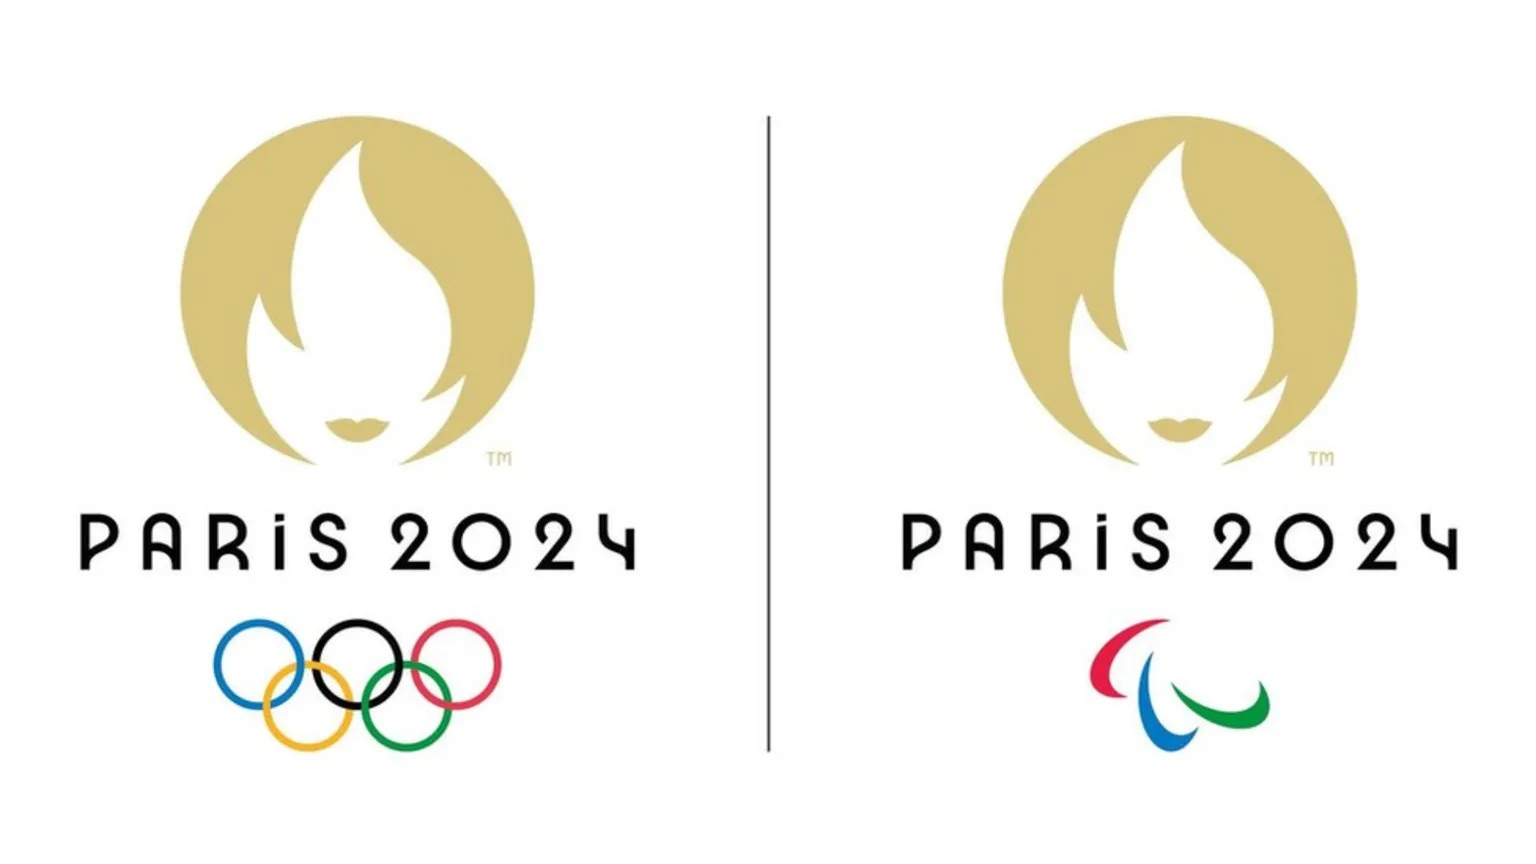

In [1]:
#@title Project
import requests
from IPython.display import Image, display
from IPython.display import HTML

# Direct image URL
image_url = "https://drive.google.com/uc?export=view&id=1uVqxXV-pNrp21oZFwwO2e5i79Y3w02ia"

# Download the image
response = requests.get(image_url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)

import base64

# Convert the image to a base64 string
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create the HTML code with the base64 image
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header</title>
    <!-- Include Font Awesome -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: flex-start; /* Align items to the top */
            /*align-items: center;*/
            padding: 20px;
            background-color: #f4f4f4;
            border-bottom: 2px solid #ccc;
        }}
        .header img {{
            border-radius: 50%;
            width: 100px;
            height: 100px;
            object-fit: cover;
            margin-right: 20px;
            box-shadow: 0 0 20px #86e3dd; /* Glowing effect */
            vertical-align: top;
        }}
        .header .text-container {{
            display: flex;
            flex-direction: column;
        }}
        .header h1 {{
            margin: 0;
            font-size: 2em;
        }}
        .header p {{
            margin: 5px 0 0 0;
            font-size: 1em;
            color: #666;
        }}
        .header .social-icons {{
            margin-top: 10px;
        }}
        .header .social-icons a {{
            margin-right: 10px;
            color: #666;
            text-decoration: none;
            font-size: 1.5em;
        }}
        .header .social-icons a:hover {{
            color: #000;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">


            <h1>Paris Olympics 2024 Data Analytics Project</h1>
            <p>Level: Beginner</p>
            <p>#soft_skills #sql #python #tableau</p>
            &nbsp;
            <p>Bartholomeow Aobe</p>

            <div class="social-icons">



                <a href="https://www.xing.com/profile/BartholomeowAyinbila_Aobe/web_profiles?expandNeffi=true" target="_blank"><i class="fab fa-patreon"></i></a>
                <a href="https://www.linkedin.com/in/bartholomeow-ayinbila-aobe-51b69671/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="mailto:barthoaobe@gmail.com"><i class="fas fa-envelope"></i>



            </div>
        </div>
    </header>
</body>
</html>
"""

# Display the HTML code in the Jupyter/Colab notebook
display(HTML(html_code))

##Step 1: Problem Statement

**Goal**: Imagine you are small country aiming to use the Paris 2024 olympics medal data to inspire young athletes in your country and prepare adequately for the 2028 olympics in Los Angeles.

##Step 2: Document the tasks during a meeting with the sports minister

###Meeting documentation template

**Goal**:  Investigate and plot the number of medals won by country, top 10 countries by total medals, number of countries by medal range, medal distribution by competition, top countries by medals per competition and number of countries participating by competition. Add country flags to the medal table.

**Visualisation**
(bar, pie, column etc.):

<figure>
  <left>
    <img src='https://drive.google.com/uc?export=view&id=15fIbp6qRXgfL6vHfpkPkIG4zCv15qxiD' width='400'/>
    <figcaption>Popular types of visuals</figcaption>
  </left>
</figure>

- Bar plot 1
  - Numeric column and aggregation (sum, percentage etc.):
Top 10 countries by medals
  - Categorical column:
  - Active filters:


- Bar plot 2
  - Numeric column and aggregation (sum, percentage etc.):
number of countries by medal range
  - Categorical column:
  - Active filters:


- Bar plot 3
  - Numeric column and aggregation (sum, percentage etc.):

  - Categorical column 1:
  - Categorical column 2:
  - Active filters: None

#Load and clean data using SQL and Python

In [44]:
#Step 1: Prepare the data

import gdown
import pandas as pd

# Replace this with the actual Google Drive file ID
file_id = "1iSS24dWJXsv-F3wOkVCX162CzJWkNE4e"

# Construct the download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the CSV file
output = "downloaded_file.csv"
gdown.download(download_url, output, quiet=False)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(output)

# Display the first few rows of the DataFrame
print(df.head())

# Assuming ipython-sql is installed
%load_ext sql

# Use a file-based SQLite database
database_filename = 'my_database.db'
df.to_sql('paris_olympics_data', f'sqlite:///{database_filename}', if_exists='replace', index=False)

# Now connect ipython-sql to the same file-based database
%sql sqlite:///my_database.db


Downloading...
From: https://drive.google.com/uc?id=1iSS24dWJXsv-F3wOkVCX162CzJWkNE4e
To: /content/downloaded_file.csv
100%|██████████| 14.7k/14.7k [00:00<00:00, 17.1MB/s]

  Competitions Rank             NOC  Gold  Silver  Bronze  Total
0      Archery    1     South Korea     5       1       1      7
1      Archery    2         France*     0       1       1      2
2      Archery    3   United States     0       1       1      2
3      Archery    4           China     0       1       0      1
4      Archery    5         Germany     0       1       0      1
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [45]:
#@title Step 2: SQL — Query the data
# Query the data to see if it works
project_data = %sql SELECT Competitions, Rank, NOC,Gold, Silver, Bronze, Bronze, Total  FROM paris_olympics_data

 * sqlite:///my_database.db
Done.


In [46]:
#@title Step 3: Python

# Get the data to Python environment
# Convert project_data to a pandas DataFrame
df = pd.DataFrame(project_data)

# Display the first 10 rows of the DataFrame
print(df.head(10))

        Competitions Rank             NOC  Gold  Silver  Bronze  Bronze  Total
0            Archery    1     South Korea     5       1       1       1      7
1            Archery    2         France*     0       1       1       1      2
2            Archery    3   United States     0       1       1       1      2
3            Archery    4           China     0       1       0       0      1
4            Archery    5         Germany     0       1       0       0      1
5            Archery    6          Mexico     0       0       1       1      1
6            Archery    7          Turkey     0       0       1       1      1
7  Artistic swimming    1           China     2       0       0       0      2
8  Artistic swimming    2   Great Britain     0       1       0       0      1
9  Artistic swimming    3   United States     0       1       0       0      1


In [47]:
# Display basic information about the DataFrame
df.info()

# Display summary statistics for the DataFrame
print(df.describe())

# Display the number of missing values in each column
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Competitions  454 non-null    object
 1   Rank          454 non-null    object
 2   NOC           454 non-null    object
 3   Gold          454 non-null    int64 
 4   Silver        454 non-null    int64 
 5   Bronze        454 non-null    int64 
 6   Bronze        454 non-null    int64 
 7   Total         454 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 28.5+ KB
             Gold      Silver      Bronze      Bronze       Total
count  454.000000  454.000000  454.000000  454.000000  454.000000
mean     0.724670    0.726872    0.848018    0.848018    2.299559
std      1.329396    1.228912    1.110370    1.110370    2.900582
min      0.000000    0.000000    0.000000    0.000000    1.000000
25%      0.000000    0.000000    0.000000    0.000000    1.000000
50%      0.000000    0.000000

# Rename country and total columns

In [48]:
df = df.rename(columns = {'NOC':'Country', 'Total':'Total Medals'})

In [49]:
df.head()

,Competitions,Rank,Country,Gold,Silver,Bronze,Bronze,Total Medals
0,Archery,1,South Korea,5,1,1,1,7
1,Archery,2,France*,0,1,1,1,2
2,Archery,3,United States,0,1,1,1,2
3,Archery,4,China,0,1,0,0,1
4,Archery,5,Germany,0,1,0,0,1


In [50]:
# Check Null Values
df.isnull().any()

,0
Competitions,False
Rank,False
Country,False
Gold,False
Silver,False
Bronze,False
Bronze,False
Total Medals,False


In [51]:
df['Country'].str.split(pat = '*').str[0]

,Country
0,South Korea
1,France
2,United States
3,China
4,Germany
...,...
449,Denmark
450,Greece
451,India
452,Norway


In [52]:
df['Country'] = df['Country'].str.split(pat = '*').str[0]
df['Country']

,Country
0,South Korea
1,France
2,United States
3,China
4,Germany
...,...
449,Denmark
450,Greece
451,India
452,Norway


In [53]:
df.dtypes

,0
Competitions,object
Rank,object
Country,object
Gold,int64
Silver,int64
Bronze,int64
Bronze,int64
Total Medals,int64


In [54]:
df.head()

,Competitions,Rank,Country,Gold,Silver,Bronze,Bronze,Total Medals
0,Archery,1,South Korea,5,1,1,1,7
1,Archery,2,France,0,1,1,1,2
2,Archery,3,United States,0,1,1,1,2
3,Archery,4,China,0,1,0,0,1
4,Archery,5,Germany,0,1,0,0,1


In [55]:
# Replace '–' with 0 in the 'Rank' column
df['Rank'] = df['Rank'].replace('–', 0)

In [56]:
df['Rank'] = df['Rank'].astype(int)

In [57]:
df.dtypes

,0
Competitions,object
Rank,int64
Country,object
Gold,int64
Silver,int64
Bronze,int64
Bronze,int64
Total Medals,int64


In [58]:
df.head()

,Competitions,Rank,Country,Gold,Silver,Bronze,Bronze,Total Medals
0,Archery,1,South Korea,5,1,1,1,7
1,Archery,2,France,0,1,1,1,2
2,Archery,3,United States,0,1,1,1,2
3,Archery,4,China,0,1,0,0,1
4,Archery,5,Germany,0,1,0,0,1


In [26]:
# Export the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)

print("\nData has been exported to output.xlsx")


Data has been exported to output.xlsx


# Dashboard

In [59]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1724414056949' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pa&#47;Paris2024OlympicsAnalytics&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Paris2024OlympicsAnalytics&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pa&#47;Paris2024OlympicsAnalytics&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1724414056949');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")

# Findings

**Goal**: Imagine you are small country aiming to use the Paris 2024 olympics medal data to inspire young athletes in your country and prepare adequately for the 2028 olympics in Los Angeles.

**Conclusion**:
1. At the Paris Summer Olympics, which featured 35 events and 93 participating countries, over 77% of countries secured fewer than 10 medals. Only one in four countries achieved 10 or more medals, and just 10% of countries won at least 30 medals. Athletics led with 140 medals, followed by Swimming with over 115 medals, and Wrestling with over 70 medals, ranking third in total medals.

2. Wrestling, Boxing, and Taekwondo had the highest proportion of bronze medals, likely due to the Olympic structure where losing semifinalists receive bronze medals in these combat sports.

2. Despite the USA having the highest overall medal count, it led in only two events: Athletics and Swimming, which are also the events with the most medals available. China topped the medal tally in over 28% of events, while the USA led in less than 6% of events.